# Multiclassification- 
### Checking Password Strength using ML Multiclassification Problem

In [2]:
import pandas as pd



In [5]:
df=pd.read_csv("/Users/nisha/Downloads/Multiclassification/data.csv",",",error_bad_lines=False)
            

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [6]:
df.shape

(669640, 2)

In [7]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [13]:
df['strength'].nunique()

3

In [15]:
df.strength.value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

In [16]:
df.groupby(['strength']).count()

,password
strength,
0,89701
1,496801
2,83137


In [17]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [20]:
X=df.iloc[:,0]

In [29]:
print(type(X))
X[:10]

<class 'pandas.core.series.Series'>


0            kzde5577
1            kino3434
2           visi7k1yr
3            megzy123
4         lamborghin1
5    AVYq1lDE4MgAZfNt
6            u6c8vhow
7            v1118714
8        universe2908
9            as326159
Name: password, dtype: object

In [22]:
Y=df.iloc[:,1]

In [23]:
Y[:10]

0    1
1    1
2    1
3    1
4    1
5    2
6    1
7    1
8    1
9    1
Name: strength, dtype: int64

In [24]:
import seaborn as sns

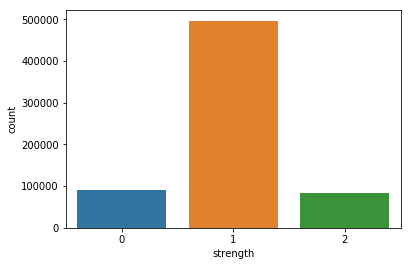

In [25]:
sns.countplot(x='strength',data=df)

In [33]:
#function to characterize the passwords

def characterize(text):
    chars=[]
    for i in text:
        chars.append(i)
    return chars
    

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=characterize)
X=vectorizer.fit_transform(X)

In [36]:
X.shape

(669639, 153)

In [37]:
vectorizer.vocabulary_

{'k': 66,
 'z': 81,
 'd': 59,
 'e': 60,
 '5': 39,
 '7': 41,
 'i': 64,
 'n': 69,
 'o': 70,
 '3': 37,
 '4': 38,
 'v': 77,
 's': 74,
 '1': 35,
 'y': 80,
 'r': 73,
 'm': 68,
 'g': 62,
 '2': 36,
 'l': 67,
 'a': 56,
 'b': 57,
 'h': 63,
 'q': 72,
 'f': 61,
 't': 75,
 'u': 76,
 '6': 40,
 'c': 58,
 '8': 42,
 'w': 78,
 '9': 43,
 '0': 34,
 'j': 65,
 'p': 71,
 '@': 49,
 '-': 31,
 'x': 79,
 '.': 32,
 '>': 47,
 '&': 26,
 '?': 48,
 '<': 45,
 '!': 21,
 ';': 44,
 '_': 54,
 '%': 25,
 '±': 99,
 '"': 22,
 '~': 85,
 '+': 30,
 '^': 53,
 '/': 33,
 '$': 24,
 ')': 28,
 ' ': 20,
 '(': 27,
 '#': 23,
 'ú': 138,
 '*': 29,
 '`': 55,
 '{': 82,
 '}': 84,
 '[': 50,
 ']': 52,
 'þ': 142,
 'ó': 132,
 'ô': 133,
 '=': 46,
 '\\': 51,
 '\x1c': 17,
 '³': 101,
 '¿': 112,
 '\x16': 12,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 '\x19': 15,
 '\x05': 3,
 '\x1b': 16,
 'å': 120,
 '‚': 147,
 'ä': 119,
 'à': 115,
 'õ': 134,
 'ß': 114,
 '´': 102,
 '«': 96,
 'ð': 129,
 'â': 117,
 '°': 98,
 '|': 83,
 '\x7f': 86,
 '²': 100,
 '¾': 111,
 'ÿ': 143,

**Code to see tfidf scores for specific password

In [38]:
feat_names=vectorizer.get_feature_names()
f_doc=X[0]
df1=pd.DataFrame(f_doc.T.todense(),index=feat_names,columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591303
5,0.566899
z,0.335926
k,0.292247
d,0.285631
e,0.221690
¹,0.000000
²,0.000000
³,0.000000
´,0.000000


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=60)

In [44]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')

In [45]:
log_class.fit(X_train,y_train)

/Users/nisha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/nisha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
print(log_class.score(X_test,y_test))

0.8119138641658205


**using multinomial as the multiclass feature parameter

In [47]:
log_mul=LogisticRegression(penalty="l2",multi_class="multinomial",solver='newton-cg')

In [48]:
log_mul.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print(log_mul.score(X_test,y_test))

0.8190918503474504


In [ ]:
#individual tests

In [63]:
x_pred=np.array(["Nishi","Nishi123","Nishi123@&"])


In [64]:
x_pred

array(['Nishi', 'Nishi123', 'Nishi123@&'], dtype='<U10')

In [65]:
x_pred=vectorizer.transform(x_pred)

In [67]:
print(log_class.predict(x_pred))

[0 1 2]


**Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [70]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
print(nb.score(X_test,y_test))

0.7425034346813213


**Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc=RandomForestClassifier(criterion='entropy',bootstrap=True)

In [79]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_predict=rfc.predict(X_test)

In [81]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [85]:
print(metrics.accuracy_score(y_test,y_predict))

0.9492662724249845


In [86]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/e4/70/bdf3e5dfe5c11c219bd8268a9501cebd2fc0b37ece17aec76db6f70bd37e/xgboost-1.1.0.tar.gz
  Complete output from command /Users/nisha/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-install-l7mp6rkm/xgboost/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-wheel-ss2iq0ok --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.7-x86_64-3.7
  creating build/lib.macosx-10.7-x86_64-3.7/xgboost
  copying xgboost/__init__.py -> build/lib.macosx-10.7-x86_64-3.7/xgboost
  copying xgboost/callback.py -> build/lib.macosx-10.7-x86_64-3.7/xgboost
  copying xgboost/compat.py -> build/lib.macosx-10.7-x86_64-3.7/xgboost
  copying xgboost/core

  copying xgboost/dmlc-core/cmake/Sanitizer.cmake -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/cmake
  copying xgboost/dmlc-core/cmake/Utils.cmake -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/cmake
  copying xgboost/dmlc-core/CMakeLists.txt -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core
  creating build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboost/dmlc-core/doc/.gitignore -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboost/dmlc-core/doc/build.md -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboost/dmlc-core/doc/conf.py -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboost/dmlc-core/doc/Doxyfile -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboost/dmlc-core/doc/index.md -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboost/dmlc-core/doc/Makefile -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/doc
  copying xgboos

  copying xgboost/dmlc-core/src/io/s3_filesys.cc -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src/io
  copying xgboost/dmlc-core/src/io/s3_filesys.h -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src/io
  copying xgboost/dmlc-core/src/io/single_file_split.h -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src/io
  copying xgboost/dmlc-core/src/io/single_threaded_input_split.h -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src/io
  copying xgboost/dmlc-core/src/io/threaded_input_split.h -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src/io
  copying xgboost/dmlc-core/src/io/uri_spec.h -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src/io
  copying xgboost/dmlc-core/src/io.cc -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src
  copying xgboost/dmlc-core/src/recordio.cc -> build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/src
  creating build/temp.macosx-10.7-x86_64-3.7/xgboost/dmlc-core/test
  copying xgboost/dmlc-core/test/.gitig

Failed to build xgboost
  Running setup.py install for xgboost ... error
    Complete output from command /Users/nisha/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-install-l7mp6rkm/xgboost/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-record-3qx8jaef/install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build/lib.macosx-10.7-x86_64-3.7
    creating build/lib.macosx-10.7-x86_64-3.7/xgboost
    copying xgboost/__init__.py -> build/lib.macosx-10.7-x86_64-3.7/xgboost
    copying xgboost/callback.py -> build/lib.macosx-10.7-x86_64-3.7/xgboost
    copying xgboost/compat.py -> build/lib.macosx-10.7-x86_64-3.7/xgboost
    copying xgboost/core.p

Command "/Users/nisha/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-install-l7mp6rkm/xgboost/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-record-3qx8jaef/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /private/var/folders/x2/9dhvxtmx4zxd61_fwmy09hjh0000gn/T/pip-install-l7mp6rkm/xgboost/
